<a href="https://colab.research.google.com/github/JuanArmas/BigData7RO/blob/main/Maze_Final_BSF_JuanArmas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laberinto__Juan Armas Alemán

# Explicacion del código.

<h1> Importación de bibliotecas y módulos

- Importa la biblioteca **matplotlib** para importar los módulos pyplot (que nos permitirá crear la visualización del laberinto) y al módulo **colors** para acceder a su submódulo, **ListedColorMap**, el cual nos dejará jugar con los colores del laberinto.

- Importa la biblioteca **numpy** que nos facilitará el uso de las distintas matrices bidimensionales y para las funciones que usaremos para la BFS.

- Módulo de la biblioteca Collections, importamos **deque** para poder crear la cola que necesitaremos para ir almancenando la lista de nodos explorados.

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from collections import deque

<h1> Creación de la clase Place

Crearemos objetos de tipo Place con coordenadas de fila y columna que representa una posición en el laberinto y que usaremos para almacenarlas como atributos del objeto para su uso

In [ ]:
class Place:
    def __init__(self, fila, columna):
        self.fila = fila
        self.columna = columna

<h1> Inicializamos Laberinto:

Creamos la matriz laberinto de 10x10 inicializado a cero.

Marcamos los bordes de dicho laberinto igualandolo a 1, de esta manera, más adelante indicaremos los colores según el valor de la casilla.

Finalmente pedimos a la función que nos devuelva el resultado para poder llamarla cuando haga falta.

In [ ]:
def inicializar_laberinto():
    laberinto = np.zeros((10, 10), dtype=int)
    laberinto[:, 0] = 1
    laberinto[:, -1] = 1
    laberinto[0, :] = 1
    laberinto[-1, :] = 1
    return laberinto

<h1> Definimos punto de inicio y de fin

A la función le pasamos por parámetro la matriz, y las coordenadas de inicio y de fin de recorrido. Esta función se encarga de reconocer esas coordenadas y asignarles un valor numérico para poder darle el color necesario en todo momento.

In [ ]:
def marcar_puntos_inicio_y_fin(laberinto, inicio, objetivo):
    laberinto[inicio] = 2
    laberinto[objetivo] = 3

<h1> Marcamos los obstáculos

La función de este método es igual que la del anterior. Le pasamos por parámetro la matriz y una lista de tuplas donde estarán reflejadas las coordenadas de cada muro interior, los cuales las igualamos a 1 dentro de este método para que tenga el color de un muro.

In [ ]:
def marcar_obstaculos(laberinto, obstaculos):
    for obstaculo in obstaculos:
        laberinto[obstaculo] = 1


<h1> Busqueda del camino óptimo

Aquí es donde recorreremos el laberinto usando BFS (Búsqueda en amplitud) desde el punto de inicio hasta el punto objetivo.

1) Generamos las filas y columnas que usaremos en la clase place.

2) Se crea la cola donde se irá almacenando las casillas por las que se ha pasado ya,  inicializado con el punto de inicio.

3) Se crea una colección que almacena las ubicaciones por las que ha pasado en "visitados". La diferencia con la cola, es que los posibles movimientos se cotejan con los almacenados aquí para evitar volver a pasar dos veces por el mismo sitio.

4) Matriz de marcadores "MARK" para recordar el camino realizado desde el incio hasta el punto actual.

5) El bucle es donde se auna todo lo anteriormente recogido para sacar los próximos movimientos a evaluar, efectuando la búsqueda en amplitud. Primero se obtiene el primer elemento a explorar de la cola con cola.popleft(), continúa adquiriendo las coordenadas de la celda actual y coteja esta celda con la celda objetivo, si es True, finaliza el bucle y muestra resultados. En caso de ser False, entra en el siguiente bucle en el que se exploran todas las celdas aledañas (nr(new row) y nc(new column)), si las nuevas celdas no son una pared (que no tengan valor 1), y no han sido visitadas, se agrega la nueva ubicacion para su exploración, se marca como visitada y se almacena en "MARK" para rastrear esa ruta.

6) Por último entramos en una verificación que resuelve el laberinto. El agente sigue las flechas hasta que encuentra el objetivo. Si el objetivo se encuentra, la función devuelve el camino que se ha seguido para llegar hasta él (y gracias a lo devuelto en este paso, más adelante hará que se imprima para tenerlo visualmente).

In [ ]:
def encontrar_camino(laberinto, inicio, objetivo):
    filas, columnas = len(laberinto), len(laberinto[0])
    cola = deque([Place(inicio[0], inicio[1])])
    visitados = set([(inicio[0], inicio[1])])
    MARK = np.zeros((filas, columnas), dtype=int)
    intentos = 1

    move = [[0, -1], [1, 0], [0, 1], [-1, 0]] #comentar esta y descomentar la siguiente para el movimiento lateral
   # move = [[0, -1], [1, 0], [0, 1], [-1, 0], [1, 1], [-1, -1], [1, -1], [-1, 1]] # Movimiento en diagonal

    while cola:
        lugar_actual = cola.popleft() # Primer elemento de la cola para explorar.
        fila, columna = lugar_actual.fila, lugar_actual.columna #coordenadas de la celda actual del objeto Place
        if (fila, columna) == objetivo:
            break

        for nr, nc in move: #Iteración sobre las posibles direcciones de movimiento
            nueva_fila, nueva_columna = fila + nr, columna + nc
            nuevas_coordenadas_object = laberinto[nueva_fila][nueva_columna]
            no_es_muro = nuevas_coordenadas_object != 1
            fila_en_rango = 0 <= nueva_fila < filas #verifica si la fila esta dentro del limite del laberinto
            columna_en_rango = 0 <= nueva_columna < columnas #igual para las columnas

            if fila_en_rango and columna_en_rango and no_es_muro and (nueva_fila, nueva_columna) not in visitados:
                cola.append(Place(nueva_fila, nueva_columna)) #añade la nueva posición a la lista de posiciones pendientes por explorar
                visitados.add((nueva_fila, nueva_columna))
                MARK[nueva_fila, nueva_columna] = fila * columnas + columna #Actualiza el camino hasta ahora

        intentos += 1

    if (fila, columna) == objetivo: #verifica si la posición actual coincide con el objetivo
        pasos = 0
        camino = [(fila, columna)] #Esta lista almacena las coordenadas del camino desde el objetivo hasta el inicio
        while (fila, columna) != inicio:
            fila, columna = MARK[fila, columna] // columnas, MARK[fila, columna] % columnas
            camino.append((fila, columna))
            pasos += 1
        camino.reverse() #se invierte la lista para asegurar que el orden es el correcto (de inicio a obejtivo)
        return camino, intentos, pasos
    else:
        return None, intentos, 0

<h1> Creación visual del laberito:

- En este punto es donde se muestra de manera visual el laberinto y su recorrido, recibiendo por parámetro ellaberinto y el camino en caso de haber encontrado alguno en la función anterior.

detallo los puntos mas relevantes:

1)  se configuran los límites del laberinto con el xlim/ylim.

2) Se cuadricula todo el laberinto con el gca y pone marcas (x,y) en cada celda.Básicamente rueda 0.5 unidades tanto el eje x y el eje y para que cuando se muestre, no aparezca la marca en un lateral de la celda sino en el centro. (el centro entre -0.5 y 0.5, que son las marcas de las columnas o filas, es 0)

3) el condicional muestra el laberinto o un mensaje de error en caso de no haber encontrado ningún recorrido.

In [ ]:
def mostrar_laberinto(laberinto, camino=None):
    colorMap = ListedColormap(["white", "gray", "orange", "green"])
    plt.figure()
    plt.imshow(laberinto, cmap=colorMap)
    plt.xlim(-0.5, len(laberinto[0]) - 0.5) #Establece los límites del gráfico para que coincidan con las dimensiones del laberinto
    plt.ylim(-0.5, len(laberinto) - 0.5)
    plt.gca().set_xticks(np.arange(-0.5, len(laberinto[0]) - 0.5, 1), minor=True)# dibuja las cuadriculas mediante marcas delimitadas
    plt.gca().set_yticks(np.arange(-0.5, len(laberinto) - 0.5, 1), minor=True)
    plt.grid(which="minor", color="black", linestyle='-', linewidth=1.09)

    if camino is not None: #espera que le pase un camino válido e invertido
        for paso, (fila, columna) in enumerate(camino):
            plt.text(columna, fila, str("x"), ha='center', va='center', color='orange', fontsize=10, fontweight='bold')
    else:
        plt.text(len(laberinto[0]) // 2, len(laberinto) // 2, "No hay camino válido para llegar al punto final.", ha='center',
                 va='center', color='red', fontsize=12, fontweight='bold')

    plt.show()


<h1> Metodo Main para ejecutar todo y mostrar los resultados:

Aquí se inicializa el laberinto, se definen los puntos de inicio y fin (objetivo) y se crean los obstáculos.

Ejecuta la función encontrar_camino() para empezar la búsqueda en amplitud y se imprimen los resultados.

In [ ]:
def main():
    laberinto = inicializar_laberinto()

    # Puntos de inicio (naranja) y objetivo (verde)
    inicio = (8, 1)
    objetivo = (1, 8)
    # inicio = (1, 1)
    # objetivo = (8, 8)

    obstaculos = [(1, 5), (1, 7), (2, 1), (2, 3), (2, 4), (2, 5), (2, 7), (3, 7), (4, 1), (4, 2), (4, 3), (4, 4),
                  (4, 5), (4, 7), (6, 3), (6, 5), (6, 6), (6, 7), (6, 8), (7, 1), (7, 2), (7, 3), (7, 5), (8, 7)]

    marcar_puntos_inicio_y_fin(laberinto, inicio, objetivo)
    marcar_obstaculos(laberinto, obstaculos)

    camino, intentos, pasos = encontrar_camino(laberinto, inicio, objetivo)

    if camino:
        print(f"Se encontró un camino válido para llegar al punto final en {intentos} intentos.")
        print(f"El agente ha dado {pasos} pasos en este intento para llegar al punto final.")
        print("Desglose del recorrido del agente:")
        for paso, (fila, columna) in enumerate(camino):
            print(f"Paso {paso + 1}: Fila {fila}, Columna {columna}")
    else:
        print(f"No hay camino válido para llegar al punto final en {intentos} intentos.")

    mostrar_laberinto(laberinto, camino)

.

.

.

.

.

.

Se encontró un camino válido para llegar al punto final en 33 intentos.
El agente ha dado 14 pasos en este intento para llegar al punto final.
Desglose del recorrido del agente:
Paso 1: Fila 8, Columna 1
Paso 2: Fila 8, Columna 2
Paso 3: Fila 8, Columna 3
Paso 4: Fila 8, Columna 4
Paso 5: Fila 7, Columna 4
Paso 6: Fila 6, Columna 4
Paso 7: Fila 5, Columna 4
Paso 8: Fila 5, Columna 5
Paso 9: Fila 5, Columna 6
Paso 10: Fila 5, Columna 7
Paso 11: Fila 5, Columna 8
Paso 12: Fila 4, Columna 8
Paso 13: Fila 3, Columna 8
Paso 14: Fila 2, Columna 8
Paso 15: Fila 1, Columna 8


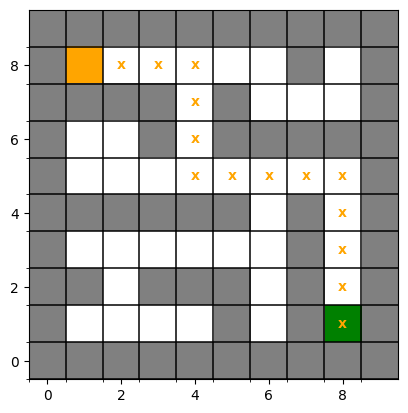

In [ ]:
#ejecutar el main
main()

.


.

.